In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('winequality-red.csv')

In [10]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [11]:
data = pd.read_csv('winequality-red.csv', sep=';', header=0)

In [12]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
print(data.shape)
print(data.info())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [17]:
# 와인데이터에서 quality 컬럼을 제거
data_drop=data.drop('quality',axis=1)

In [15]:
data_drop.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


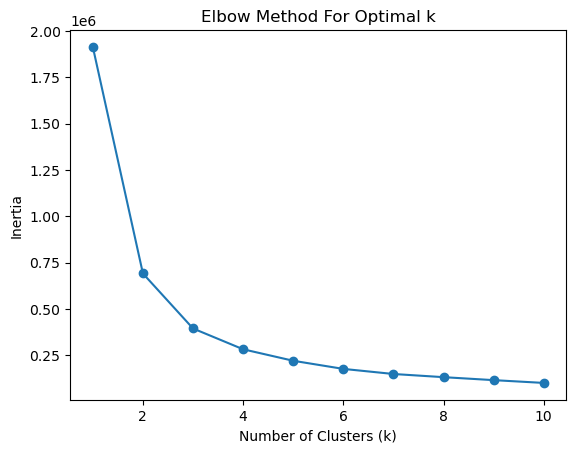

In [16]:
# 엘보우 방법을 통해 그래프의 기울기가 감소하는 지점인 k=3을 적정 k값으로 선정
def calculate_inertia(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.inertia_

k_values = range(1, 11)
inertias = [calculate_inertia(data_drop, k) for k in k_values]

plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [18]:
# k-means 클러스터링을 한 후 기존 데이터에 클러스터 속성을 추가함
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_drop)

labels = kmeans.labels_

centers = kmeans.cluster_centers_
data_new=data_drop.copy()
data_new['Cluster'] = labels

In [19]:
print(data_new)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# k means를 통해 만든 세 개의 클러스터의 특징을 비교하기 위한 방법
# 1. 데이터 시각화 : 데이터의 구조(클러스터의 형태, 위치, 밀도)를 이해하고 클러스터의 특징을 시각적으로 비교 가능
# 2. 클러스터 중심점 : 시각화 한 데이터 위에 각 클러스터를 대표하는 중심점(centriod)을 표시한다
# 3. 클러스터 크기 비교 : 각 클러스터의 중요성을 비교하는데 도움이 됨
# 4. 통계적 비교 : 클러스터의 특성을 통계적으로 분석하여 중요한 특징이나 차이점을 확인할 수 있다(평균, 분산, 표준 편차 비교)
# 5. 도메인 지식 : 위에서 비교한 특징들에 도메인 지식을 더해 각 클러스터의 의미를 해석하고 해석된 결과를 비교

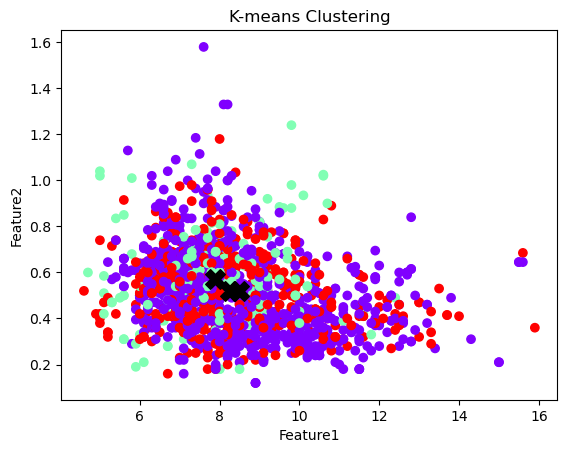

In [20]:
# 1. 데이터 시각화
# 2. 클러스터 중심점
# 하지만 속성이 10개 이상인 데이터를 2차원으로 시각화하는 것은 사실상 불가능하다
plt.scatter(data_new.iloc[:,0], data_new.iloc[:,1], c=data_new['Cluster'], cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='black')  # 클러스터 중심 표시
plt.title('K-means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [21]:
# 데이터를 2차원으로 차원축소한다
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_drop)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
print(pca_df)

            PC1        PC2
0    -13.224905  -2.023900
1     22.037724   4.408322
2      7.162673  -2.501461
3     13.430063  -1.951122
4    -13.224905  -2.023900
...         ...        ...
1594   1.129111  16.313102
1595   9.489984  21.627525
1596  -3.431354  14.271243
1597   1.132878  16.316167
1598  -3.874377   3.126348

[1599 rows x 2 columns]


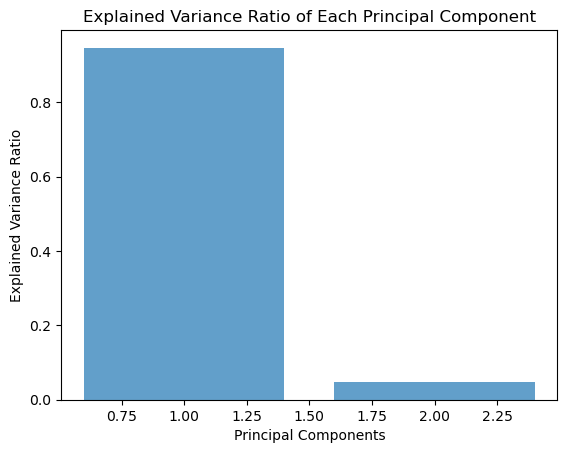

In [23]:
# 2개의 component로 차원을 축소하였을 때 90% 이상의 분산을 설명할 수 있다(거의 100%에 가깝다)
explained_variance_ratio = pca.explained_variance_ratio_

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

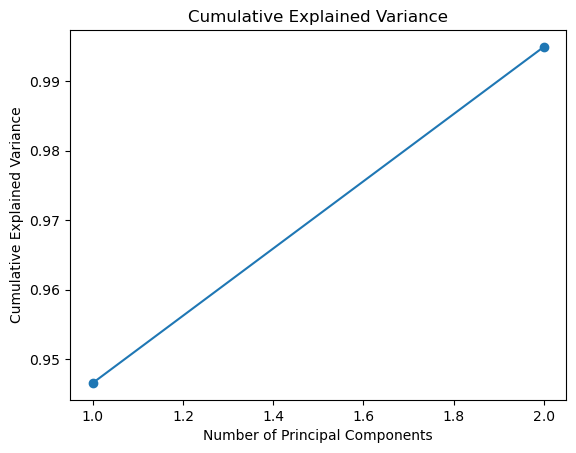

In [22]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

/Users/kyunghoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


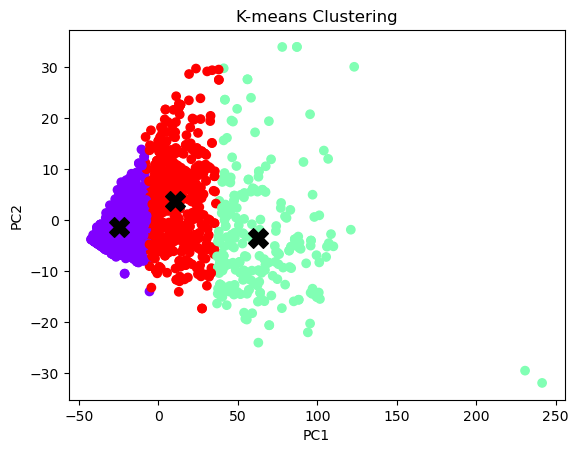

In [24]:
# 클러스터링을 한 데이터를 2차원으로 시각화 하기 위해 pca를 한 데이터 위에 label별로 색깔을 입힌다.(단순히 시각화를 하기 위함)
# pca를 한 데이터로 시각화하는 것이 하지 않은 것보다 클러스터가 더 분명하게 구분되어있다.
# 우측 하단의 두개의 데이터포인트는 이상치로 판단할 수 있다
centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_new['Cluster'], cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
# 3. 클러스터 크기 비교
# 4. 통계적 비교
df0=data_new[data_new['Cluster']==0]
df1=data_new[data_new['Cluster']==1]
df2=data_new[data_new['Cluster']==2]

In [26]:
df0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0
mean,8.477006,0.519240,0.270204,2.370359,0.084508,9.162874,22.851497,0.996621,3.310371,0.648407,10.591337,0.0
std,1.830379,0.189045,0.209289,1.027242,0.037562,4.603441,8.783540,0.001811,0.150110,0.143418,1.059967,0.0
min,5.200000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.860000,0.330000,8.400000,0.0
25%,7.100000,0.380000,0.070000,1.800000,0.068000,6.000000,15.000000,0.995460,3.210000,0.550000,9.700000,0.0
50%,8.000000,0.510000,0.250000,2.100000,0.077000,8.000000,23.000000,0.996580,3.310000,0.620000,10.500000,0.0
75%,9.600000,0.640000,0.450000,2.500000,0.088500,12.000000,29.000000,0.997685,3.400000,0.720000,11.300000,0.0
max,15.600000,1.580000,0.760000,15.500000,0.415000,27.000000,44.000000,1.003150,3.780000,1.560000,14.000000,0.0


In [27]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.887552,0.572365,0.275643,3.232365,0.088398,26.151452,108.506224,0.996935,3.289627,0.652033,10.008921,1.0
std,1.307642,0.169825,0.160142,2.500377,0.033238,11.710434,25.692431,0.002193,0.154667,0.225805,1.038087,0.0
min,4.700000,0.180000,0.000000,0.900000,0.012000,6.000000,80.000000,0.990070,2.870000,0.390000,8.500000,1.0
25%,7.200000,0.470000,0.180000,2.000000,0.074000,17.000000,90.000000,0.996160,3.200000,0.530000,9.400000,1.0
50%,7.800000,0.580000,0.260000,2.400000,0.082000,24.000000,102.000000,0.997200,3.280000,0.580000,9.600000,1.0
75%,8.800000,0.650000,0.360000,3.000000,0.095000,32.000000,121.000000,0.998000,3.360000,0.690000,10.100000,1.0
max,12.400000,1.240000,0.780000,15.400000,0.270000,72.000000,289.000000,1.003690,3.850000,1.980000,14.000000,1.0


In [28]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.0
mean,8.267495,0.520994,0.270057,2.488145,0.091761,21.855641,55.585086,0.996861,3.322199,0.676520,10.344997,2.0
std,1.735690,0.163442,0.185427,1.120333,0.063137,9.021298,11.555336,0.001843,0.160093,0.176484,1.027350,0.0
min,4.600000,0.160000,0.000000,1.200000,0.034000,2.000000,35.000000,0.990200,2.740000,0.400000,8.700000,2.0
25%,7.100000,0.400000,0.115000,1.900000,0.072000,15.000000,46.000000,0.995720,3.210000,0.570000,9.500000,2.0
50%,7.900000,0.510000,0.260000,2.200000,0.080000,21.000000,54.000000,0.996800,3.330000,0.640000,10.100000,2.0
75%,9.100000,0.622500,0.400000,2.600000,0.090000,27.000000,65.000000,0.998000,3.410000,0.750000,10.950000,2.0
max,15.900000,1.180000,1.000000,11.000000,0.611000,53.000000,82.000000,1.003200,4.010000,2.000000,14.900000,2.0


In [29]:
# 클러스터 크키 => cluster0 : 835 / cluster1 : 241 / cluster2 : 523
# total(free) sulfur dioxide에서 평균값이 눈에 띄는 차이를 보였다

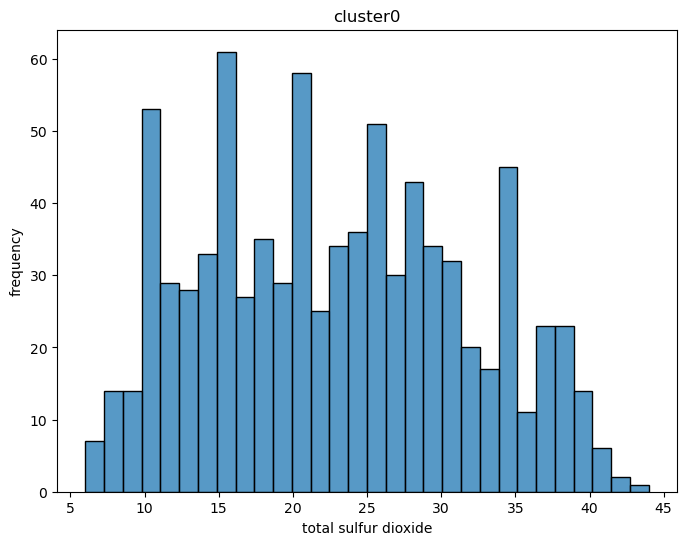

In [30]:
#cluster0 평균 22, 분산 8
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df0['total sulfur dioxide'], kde=False, bins=30)
plt.title('cluster0')
plt.xlabel('total sulfur dioxide')
plt.ylabel('frequency')
plt.show()

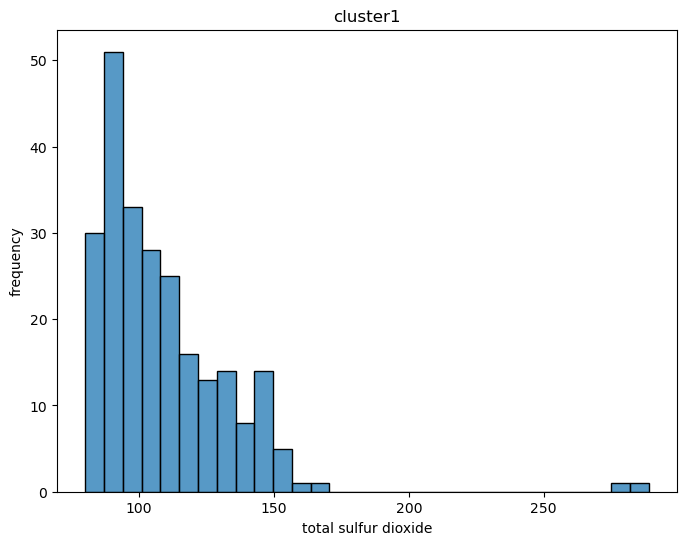

In [31]:
#cluster1 평균 108, 분산 25
plt.figure(figsize=(8, 6))
sns.histplot(df1['total sulfur dioxide'], kde=False, bins=30)
plt.title('cluster1')
plt.xlabel('total sulfur dioxide')
plt.ylabel('frequency')
plt.show()

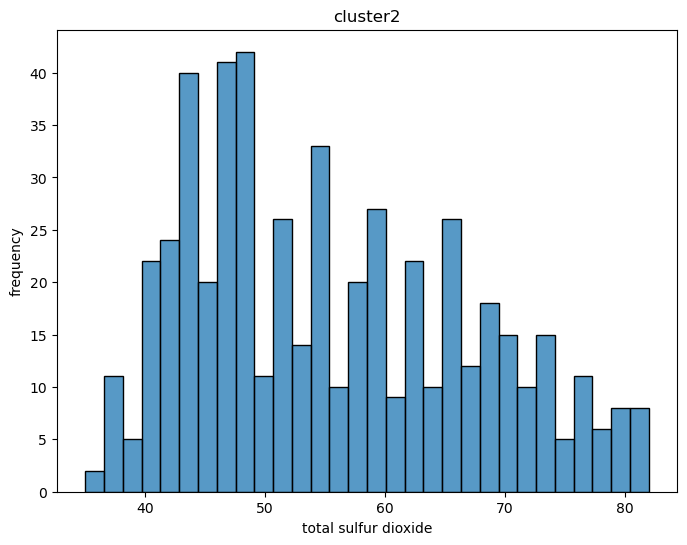

In [32]:
#cluster2 평균 55, 분산 11
plt.figure(figsize=(8, 6))
sns.histplot(df2['total sulfur dioxide'], kde=False, bins=30)
plt.title('cluster2')
plt.xlabel('total sulfur dioxide')
plt.ylabel('frequency')
plt.show()

In [ ]:
#Total sulfur dioxide는 화합물에서 자유로운 상태의 이산화황(SO2)과 결합된 상태의 황을 합한 총 황의 양을 나타낸다.
#와인 생산에서는 total sulfur dioxide가 와인에 첨가되어 와인의 안정성을 유지하고 산화를 방지하는 데 사용된다. 
#Total sulfur dioxide는 free sulfur dioxide와 bound sulfur dioxide의 합으로 나타낼 수 있다.

#황을 태우면 산소와 결합하여 이산화황이 되는데 와인메이커들은 압착된 포도즙이 미생물에 의해 변질되지 않도록 하는 항미생물제, 
#와인이 갈색으로 변하는 산화 방지를 위한 항산화제, 와인의 풍미를 유지하기 위한 보존제로 사용하고 있다.
#당도가 높은 와인에 더 넣어 2차 발효가 일어나지 않도록 한다

#와인의 경우, 기술의 발달로 사용이 줄기는 하였지만 미국에서는 이산화황 농도는 보통 350ppm, 유기농 와인의 경우에는 100ppm까지 허용되고, 
#실제 거의 대부분 유기농 와인은 평균 40ppm수준으로 첨가되어 있다. 
#유기농 와인의 경우, 레드 와인 20~60ppm(평균 40ppm), 스파클링 와인 50~90ppm(평균 70ppm)이 들어 있다.

#와인에 들어 있는 이산화황의 양은 대체로 10-350ppm (mg/L) 범위이며, 이는 와인의 종류와 당도에 따라 달라집니다. 
#일반적으로 드라이 화이트 와인은 스위트 화이트 와인보다 이산화황 함량이 적으며, 레드 와인은 화이트 와인보다 더 적습니다.

In [ ]:
# 위 지식들을 기반으로 데이터를 다시 살펴보았을 때 residual sugar(잔여설탕)은 와인의 당도와 관련이 있으며
# cluster1의 이산화황과 잔여 설탕의 양이 다른 클러스터에 비해 높다는 점을 알 수 있다.
# => 즉, cluster1은 다른 클러스터와 이산화황, 잔여설탕에 있어서 차이점을 보이며, 다른 클러스터의 와인들보다 당도가 높은
# 그와 동시에 와인의 산화를 방지하는 이산화황이 더 많이 들어있는 와인임을 알 수 있다.

In [ ]:
# 이 뒤에 DBSCAN을 통해 클러스터링 하는 과정을 설명하고, 시각화해서 kmeans와 비교했을 때 클러스터링이 제대로 되었는지 확인하면 될듯